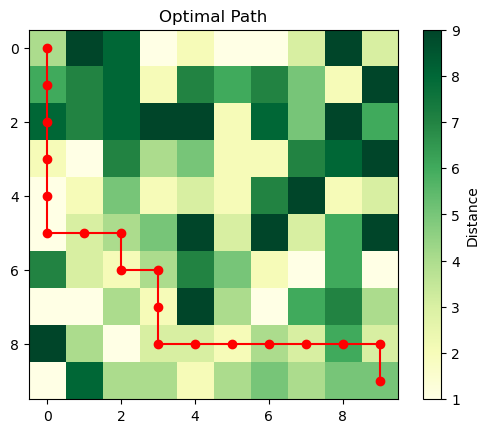

In [1]:

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import heapq  # For priority queue implementation

# Define the city grid and cost function
grid_size = (10, 10)  # Adjust grid size as needed
distance_matrix = np.random.randint(1, 10, size=grid_size)
traffic_matrix = np.random.randint(1, 5, size=grid_size)

# Define heuristic functions
def manhattan_distance(start, end):
    return abs(start[0] - end[0]) + abs(start[1] - end[1])

def euclidean_distance(start, end):
    return np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)

# Implement A* Algorithm
def a_star_algorithm(start, end, distance_matrix, traffic_matrix, heuristic_func):
    rows, cols = distance_matrix.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    cost_so_far = {start: 0}
    
    while open_set:
        current_cost, current = heapq.heappop(open_set)
        
        if current == end:
            break
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Possible moves
            neighbor = (current[0] + dx, current[1] + dy)
            
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                traffic_penalty = traffic_matrix[neighbor]
                new_cost = cost_so_far[current] + distance_matrix[neighbor] + traffic_penalty
                
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic_func(neighbor, end)
                    heapq.heappush(open_set, (priority, neighbor))
                    came_from[neighbor] = current
                    
    return came_from, cost_so_far

# Reconstruct and visualize the path
def reconstruct_path(came_from, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = came_from.get(current)
    path.append(start)
    path.reverse()
    return path

# Visualization
def visualize_grid(distance_matrix, path):
    plt.imshow(distance_matrix, cmap="YlGn", origin="upper")
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, marker="o", color="red")
    plt.title("Optimal Path")
    plt.colorbar(label="Distance")
    plt.show()

# Run the experiment
start = (0, 0)  # Starting point
end = (9, 9)  # Destination

# Choose heuristic: Manhattan or Euclidean
heuristic = manhattan_distance

came_from, cost_so_far = a_star_algorithm(start, end, distance_matrix, traffic_matrix, heuristic)
path = reconstruct_path(came_from, start, end)

# Visualize the path on the grid
visualize_grid(distance_matrix, path)
